In [1]:
from networkx.algorithms import bipartite
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx 
import seaborn as sns 
%matplotlib inline 

In [2]:
DF = pd.read_csv('data/wikis_table_anon.csv',header=0,low_memory=False)

In [3]:
DF.head()

,Year,TeamID,UserID,UserType,PageName,SectionID,ActionType,EditTime,SignedEditSize
0,2008,76,IGEM HQ,igemHQ,Team:Princeton,0.0,create,2008-05-12 21:42:49+00:00,2380.0
1,2008,76,e96151739e584a33571a9478c761d2aa,user,Team:Princeton,0.0,edit,2008-07-21 02:05:07+00:00,21.0
2,2008,76,e96151739e584a33571a9478c761d2aa,user,Team:Princeton,0.0,edit,2008-07-21 02:31:06+00:00,177.0
3,2008,76,e96151739e584a33571a9478c761d2aa,user,Team:Princeton,0.0,edit,2008-07-21 02:32:40+00:00,4.0
4,2008,76,e96151739e584a33571a9478c761d2aa,user,Team:Princeton,0.0,edit,2008-07-21 05:19:21+00:00,-113.0


In [4]:
DF = DF.sort_values(by=['EditTime'])

In [5]:
DF['SetA'] = [i.strip()+':'+str(j) for i,j in zip(DF['PageName'],DF['SectionID'])]

In [6]:
DF.head()

,Year,TeamID,UserID,UserType,PageName,SectionID,ActionType,EditTime,SignedEditSize,SetA
47459,2008,128,IGEM HQ,igemHQ,Team:MIT/Notebook,2.0,create,2008-05-12 21:10:14+00:00,0.0,Team:MIT/Notebook:2.0
47174,2008,128,IGEM HQ,igemHQ,Team:MIT,0.0,create,2008-05-12 21:10:14+00:00,2338.0,Team:MIT:0.0
47279,2008,128,IGEM HQ,igemHQ,Team:MIT/Team,0.0,create,2008-05-12 21:10:14+00:00,3015.0,Team:MIT/Team:0.0
47280,2008,128,IGEM HQ,igemHQ,Team:MIT/Team,2.0,create,2008-05-12 21:10:14+00:00,0.0,Team:MIT/Team:2.0
47281,2008,128,IGEM HQ,igemHQ,Team:MIT/Team,6.0,create,2008-05-12 21:10:14+00:00,0.0,Team:MIT/Team:6.0


In [7]:
DF['EditTime'] = pd.to_datetime(DF['EditTime'],format='%Y-%m-%d')

In [8]:
DF['days'] = (DF['EditTime'] - DF.iloc[0]['EditTime']).dt.days

In [9]:
DF['week'] = DF['days'].apply(lambda x: np.floor_divide(x,7))

In [10]:
df_grouped = DF.groupby('week')

In [11]:
Edges = [len(j) for i,j in df_grouped.groups.items()]

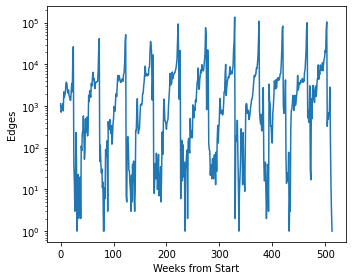

In [12]:
plt.figure(figsize=(5,4))
plt.plot(Edges)
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('Weeks from Start')
plt.ylabel('Edges')
plt.tight_layout()

In [80]:
def plot_bipartite_network(D,week):
    
    df = D.get_group(week)
    
    topNodes = list(set(df['UserID']))
    btmNodes = list(set(df['SetA']))
    
    edges = list(zip(df['UserID'].values,df['SetA'].values))
    
    G = nx.Graph()
    G.add_nodes_from(topNodes,bipartite=0)
    G.add_nodes_from(btmNodes,bipartite=1)
    G.add_edges_from(edges)
    
    node_color = []
    for i in G.nodes:
        
        if i in topNodes:
            node_color.append('#fc8d62')
        else:
            node_color.append('#8da0cb')
    
    plt.figure(figsize=(8,8))
    pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw(G,pos=pos,node_color=node_color,alpha=0.8,node_size=25,edge_color='lightgray')
    plt.savefig('plots/example_fig.png',dpi=1000, transparent=True)
    print(f' # Top Nodes (Users) - {len(topNodes)} \n # Bottom Nodes (Sections) - {len(btmNodes)} \n # Edges - {len(edges)}')
    print(f'length of DataFrame {len(df)}')
    return G,topNodes,btmNodes

<IPython.core.display.Javascript object>


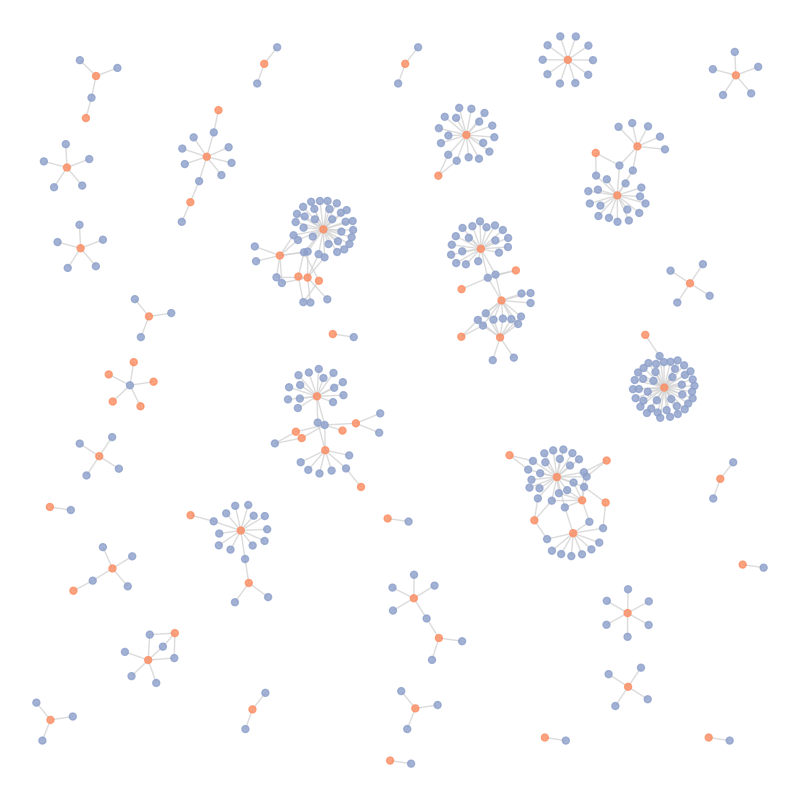

 # Top Nodes (Users) - 73 
 # Bottom Nodes (Sections) - 322 
 # Edges - 1809
length of DataFrame 1809


In [81]:
G,T,B = plot_bipartite_network(df_grouped,55)

<IPython.core.display.Javascript object>


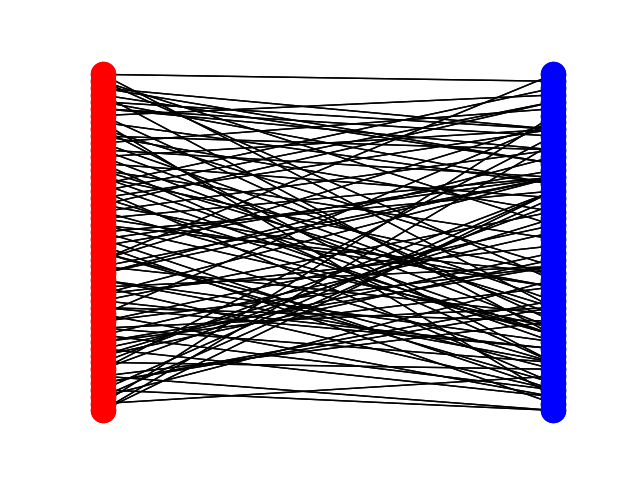

In [72]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook
# Define the number of nodes in each set
num_nodes_A = 50
num_nodes_B = 50

# Define the initial number of edges per node
init_num_edges = 2

# Initialize the network as a bipartite graph
G = nx.Graph()
G.add_nodes_from(range(num_nodes_A), bipartite=0)
G.add_nodes_from(range(num_nodes_A, num_nodes_A+num_nodes_B), bipartite=1)

# Randomly connect nodes in the initial network
for i in range(num_nodes_A):
    for j in np.random.choice(num_nodes_B, init_num_edges):
        G.add_edge(i, j+num_nodes_A)

# Define the number of new nodes to add
num_new_nodes = 1

# Define the number of frames for the animation
num_frames = 1000

# Define the update function for the animation
def update(frame):
    if frame > 0:
        # Add a new node to set A
        new_node_A = num_nodes_A + frame - 1
        G.add_node(new_node_A, bipartite=0)
        for j in range(num_nodes_B):
            prob = sum(1 for (u, v) in G.edges(v=j+num_nodes_A)) / G.degree(j+num_nodes_A)
            if np.random.binomial(1, prob) == 1:
                G.add_edge(new_node_A, j+num_nodes_A)
        
        # Add a new node to set B
        new_node_B = num_nodes_A + num_new_nodes + frame - 1
        G.add_node(new_node_B, bipartite=1)
        for i in range(num_nodes_A):
            prob = sum(1 for (u, v) in G.edges(u=i)) / G.degree(i)
            if np.random.binomial(1, prob) == 1:
                G.add_edge(i, new_node_B)
        
    # Draw the bipartite graph
    pos = dict()
    pos.update((n, (1, i)) for i, n in enumerate(range(num_nodes_A)))
    pos.update((n, (2, i)) for i, n in enumerate(range(num_nodes_A, num_nodes_A+num_nodes_B)))
    nodes_A = {n for n, d in G.nodes(data=True) if d['bipartite']==0}
    nodes_B = set(G) - nodes_A
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_A, node_color='r')
    nx.draw_networkx_nodes(G, pos, nodelist=nodes_B, node_color='b')
    nx.draw_networkx_edges(G, pos, edgelist=G.edges())
    plt.axis('off')

# Create the animation
ani = animation.FuncAnimation(plt.gcf(), update, frames=num_frames, interval=1e3,repeat=True)

# Show the animation
plt.show()


<IPython.core.display.Javascript object>


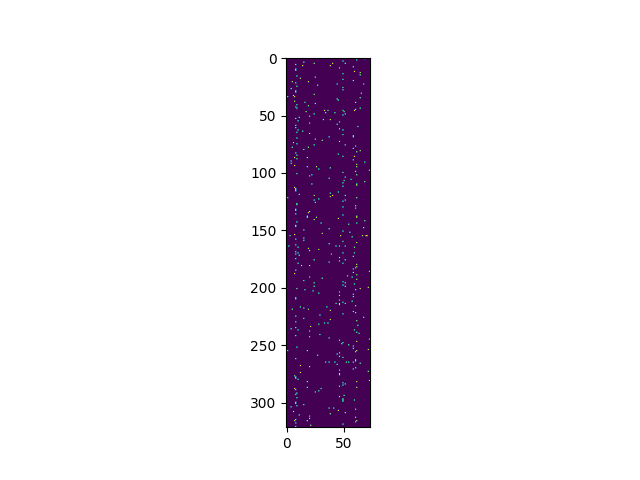

In [83]:
plt.figure()
BiAd = bipartite.biadjacency_matrix(G,row_order=B)
BiAd = BiAd.todense()
plt.imshow(BiAd)